## Zadanie 1

# Generator ACORN (Additive Congruential Random Number)

Pierwsze zadanie będzie polegać na zaimplementowaniu generatora liczb pseudolosowych ACORN według sposobu opisanego w treści zadania. Generator ACORN k-tego rzędu oparty jest na ciągach liczbowych zdefiniowanych przez równania rekurencyjne:
$$X_{n}^0 = X_{n-1}^0, \quad n \geq 1$$
$$X_{n}^{m} = \left(X_{n}^{m-1} + X_{n-1}^{m}\right) \text{mod}M, \quad m = 1, ..., k, n \geq 1$$
$$Y_{n}^{k} = \dfrac{X_{n}^{k}}{M}, \quad n \geq 1.$$
Zaimplementowana funkcja będzie miała postać $ACORN(N, k, M, Lag)$, gdzie $N$ to ilość zwracanych liczb pseudolosowych $Y_n^k$, dla $n=1, \ldots, N$, $k$ - rząd algorytmu, $M$ - dostatecznie duża liczba naturalna, przez którą dzielone są wyrazy przy obliczaniu kolejnych wyrazów ciągu, oraz $Lag$ - liczba omijanych pierwszych wyrazów ciągu.

Generator liczb pseudolosowych jest to program, który na podstawie podanej liczby (ziarna - seed) rozpoczyna obliczanie kolejnych wyrazów ciągu. Otrzymany ciąg przypomina ciąg losowo wybranych liczb.

Pierwszym krokiem będzie zaimportowanie odpowiednich bibliotek:

In [2]:
import matplotlib.pyplot as plt
from time import perf_counter
import numpy as np
import tracemalloc

Następnie definiujemy funkcję ACORN, przyjmującą parametry podane wyżej:

In [3]:
def ACORN(N: int, k: int, M: int, Lag: int) -> list:
    """Wygeneruj N liczb pseudolosowych z użyciem algorytmu acorn, z opuszczeniem Lag pierwszych wyrazów.

    Parameters
    ----------
        N: int
            Ilość liczb pseudolosowych, które zostaną wygenerowane.

        k: int
            Rząd wygenerowanych liczb.

        M: int
            Liczba, przez którą dzielone są wyrazy przy obliczaniu kolejnych wyrazów ciągu.

        Lag: int
            Ilość początkowych wyrazów, które zostaną ominięte przy podaniu ostatecznego wyniku.

    Returns
    -------
        final_result: list
            Lista wygenerowanych liczb pseudolosowych.
    """
    seed = 123456
    all_results = [[seed for i in range(N)]] + [
        [0 for i in range(N)] for j in range(k - 1)
    ]

    for i in range(1, k):
        for j in range(1, N):
            all_results[i][j] += (all_results[i - 1][j] + all_results[i][j - 1]) % M

    k_th_result = all_results[-1]
    k_th_result_omitting_lag = k_th_result[Lag:]
    final_result = [x / M for x in k_th_result_omitting_lag]
    return final_result

Przykładowymi parametrami, podanymi w treści zadania, są: $M=2^{89}-1$ (liczba pierwsza Mersenne'a), $k=9$, $Lag=10^3$. Poniższy wykres został wygenerowany właśnie dla takich parametrów. Dodatkowo dla czytelności wykresu przyjmujemy $N=5000$.

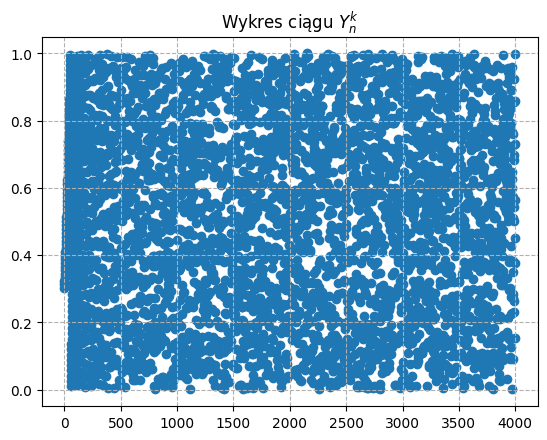

In [4]:
wynik = ACORN(5000, 9, 2 ** (81) - 1, 1000)
plt.Figure(figsize=(4, 3))
plt.scatter([i for i in range(len(wynik))], wynik)
plt.grid(linestyle="--")
plt.title("Wykres ciągu $Y_n^k$")
plt.show()

Po prawej stronie wykresu można zaobserwować układanie się wyrazów w uporządkowany wzór. Oznacza to, że aby wygenerowany ciąg liczbowy można nazwać pseudolosowym, należy odpowiednio dobrać parametr $Lag$, w przeciwnym razie początek ciągu traci cechy ciągu liczb pseudolosowych. Poniżej znajdują się dla porównania 2 inne wykresy - z parametrem $Lag$ o wartości odpowiednio mniejszej oraz większej niż parametr zasugerowany w treści zadania.

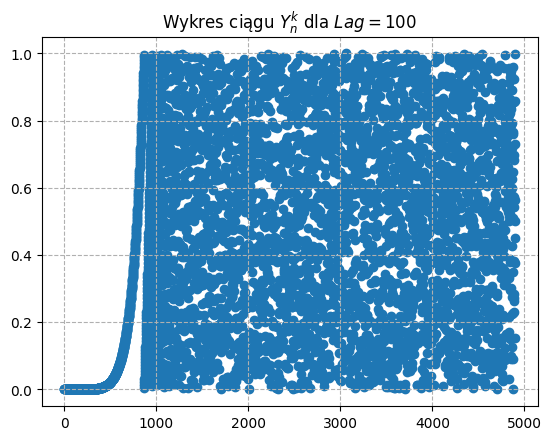

In [5]:
wynik = ACORN(5000, 9, 2 ** (81) - 1, 100)
plt.Figure(figsize=(4, 3))
plt.scatter([i for i in range(len(wynik))], wynik)
plt.grid(linestyle="--")
plt.title("Wykres ciągu $Y_n^k$ dla $Lag=100$")
plt.show()

Na powyższym wykresie można dokładniej zaobserwować zjawisko opisane powyżej - początkowe wyrazy ciągu układają się w uporządkowaną strukturę i dopiero po pewnym czasie zaczynają przypominać ciąg liczb losowych. Przyjęta tutaj wartość parametru $Lag =100$.

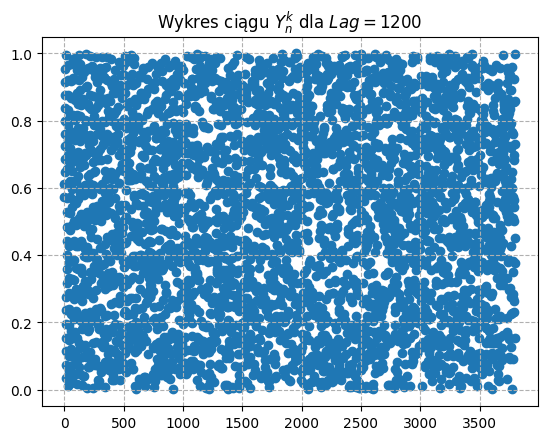

In [6]:
wynik = ACORN(5000, 9, 2 ** (81) - 1, 1200)
plt.Figure(figsize=(4, 3))
plt.scatter([i for i in range(len(wynik))], wynik)
plt.grid(linestyle="--")
plt.title("Wykres ciągu $Y_n^k$ dla $Lag=1200$")
plt.show()

Na kolejnym wykresie zilustrowano sposób układania się wyrazów ciągu, jeżeli ominiemy pierwsze $Lag=1200$ wyrazów. Patrząc na podany wykres, wygenerowany ciąg liczb można nazwać pseudolosowym - nie można wyodrębnić żadnej uporządkowanej struktury, wykres otrzymanego ciągu oraz wykres ciągu zupełnie losowo wybranych liczb mogłyby się wydawać nierozróżnialne.

W kolejnym kroku wygenerowany został wykres $Y_{n-1}^k \mapsto Y_n^k$. Wybrane parametry to: $N=5000$, $k=9$, $M=2^{89}-1$, $Lag=1000$.

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Magdalena\AppData\Local\Temp\ipykernel_21016\2183971680.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Wykres funkcji $Y_{n-1}^k \mapsto Y_n^k$")


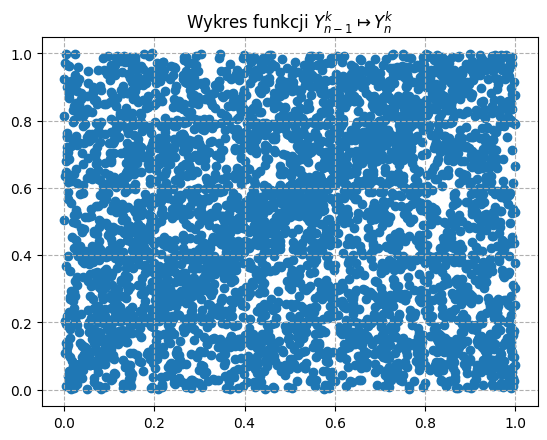

In [7]:
wynik = ACORN(5000, 9, 2 ** (81) - 1, 1000)
plt.Figure(figsize=(4, 3))
plt.scatter([1] + ACORN(5000 - 1, 9, 2 ** (81) - 1, 1000), wynik)
plt.grid(linestyle="--")
plt.title("Wykres funkcji $Y_{n-1}^k \mapsto Y_n^k$")
plt.show()

Patrząc na wykres, można zauważyć, że wyniki układają się w uporządkowany wzór jedynie wzdłuż przekątnej kwadratu [0, 1]x[0, 1]. Może mieć to związek z faktem, że początkowe wyrazy wydają się jeszcze nie tworzyć ciągu losowego dla $Lag=1000$ - otrzymany przez nas ciąg zaczyna mieć cechy ciągu pseudolosowego dla większego $n$, w związku z czym konieczny jest dobór odpowiedniego parametru $Lag$. Aby to sprawdzić, wygenerujmy wykres dla takich samych parametrów $N$, $k$ oraz $M$ jak poprzednio, zmieniając natomiast wartość parametru $Lag$ na 1200:

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Magdalena\AppData\Local\Temp\ipykernel_21016\2620750544.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Wykres funkcji $Y_{n-1}^k \mapsto Y_n^k$ dla $Lag=1200$")


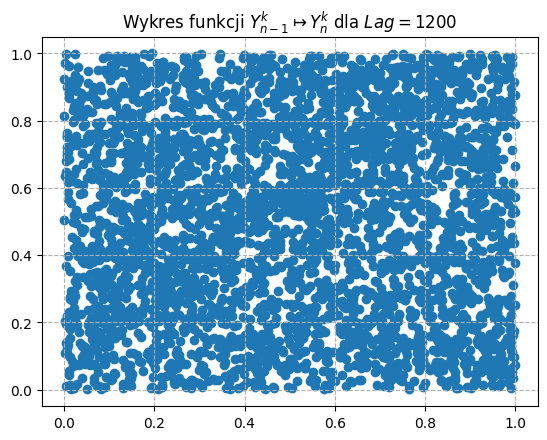

In [8]:
wynik = ACORN(5000, 9, 2 ** (81) - 1, 1200)
plt.Figure(figsize=(4, 3))
plt.scatter([1] + ACORN(5000 - 1, 9, 2 ** (81) - 1, 1200), wynik)
plt.grid(linestyle="--")
plt.title("Wykres funkcji $Y_{n-1}^k \mapsto Y_n^k$ dla $Lag=1200$")
plt.show()

Po analizie powyższego wykresu można wysnuć wniosek, że dzięki właściwemu doborowi parametru $Lag$ na wykresie $Y_{n-1}^k \mapsto Y_n^k$ przestają być zauważalne widoczne wcześniej uporządkowane struktury i wygenerowany ciąg przypomina ciąg losowo wybranych liczb.

Ostatnim krokiem będzie wygenerowanie histogramu, z którego będzie można odczytać, jak wiele razy pojawiły się wśród wyników liczby należące do konkretnych przedziałów. W pierwszym przypadku rozważymy przypadek parametrów $N=5000$, $k=9$, $M=2^{89}-1$, $Lag=1000$.

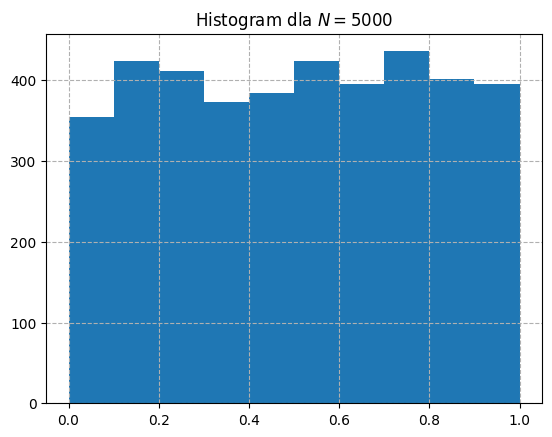

In [9]:
wynik = ACORN(5000, 9, 2 ** (81) - 1, 1000)
plt.Figure(figsize=(4, 3))
plt.hist(wynik)
plt.grid(linestyle="--")
plt.title("Histogram dla $N=5000$")
plt.show()

Następnie przypadek parametrów $N=5000$, $k=9$, $M=2^{89}-1$, $Lag=1200$:

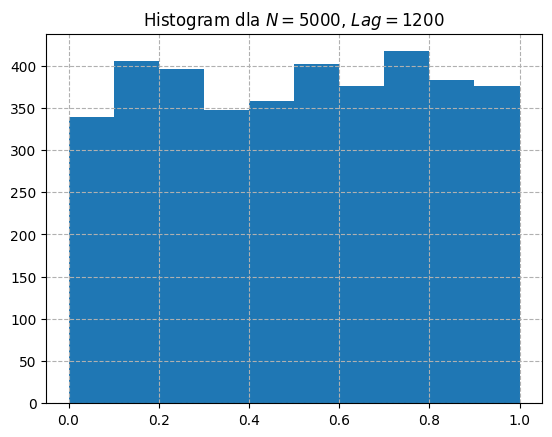

In [10]:
wynik = ACORN(5000, 9, 2 ** (81) - 1, 1200)
plt.Figure(figsize=(4, 3))
plt.hist(wynik)
plt.grid(linestyle="--")
plt.title("Histogram dla $N=5000$, $Lag=1200$")
plt.show()

Obydwa histogramy nie różnią się znacząco.

Rozważymy również przypadek $N = 20000$:

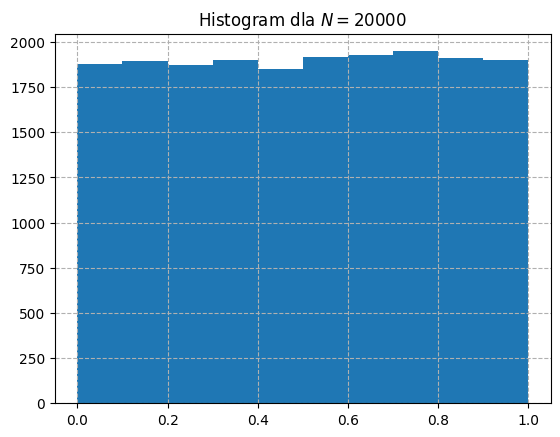

In [11]:
wynik = ACORN(20000, 9, 2 ** (81) - 1, 1000)
plt.Figure(figsize=(4, 3))
plt.hist(wynik)
plt.grid(linestyle="--")
plt.title("Histogram dla $N=20000$")
plt.show()

Analizując wszystkie trzy powyższe histogramy, można wysnuć wnioski, że im większe $N$, tym bardziej wykres częstości występowania poszczególnych wartości przypomina gęstość rozkładu jednostajnego $U(0, 1)$, co wskazuje na poprawność użytego do wyznaczania kolejnych wyrazów ciągu algorytmu.

W kostatniej części znajduje się porównanie wydajności zaimplementowanego generatora liczb pseudolosowych ACORN z wbudowanym generatorem numpy. Dwie cechy brane pod uwagę to czas potrzebny na wygenerowanie 20000 próbek oraz zużycie pamięci.

In [29]:
# porównanie wydajności z generatorem Numpy - czas

start_ACORN = perf_counter()
ACORN(20000, 9, 2 ** (81) - 1, 5000)
end_ACORN = perf_counter()

print("Czas dla generatora ACORN: ", end_ACORN - start_ACORN)

start_Numpy = perf_counter()
np.random.uniform(0, 1, 20000)
end_Numpy = perf_counter()

print("Czas dla generatora Numpy: ", end_Numpy - start_Numpy)

Czas dla generatora ACORN:  0.03351709991693497
Czas dla generatora Numpy:  0.0003597999457269907


Na podstawie powyższego porównania widzimy, że wygenerowanie 20000 próbek zajmuje mniej czasu w przypadku generatora numpy.

In [30]:
# porównanie wydajności z generatorem Numpy - zużycie pamięci
tracemalloc.start()
ACORN(20000, 9, 2 ** (81) - 1, 5000)
print(
    "Maksymalne zużycie pamięci w trakcie działania funkcji ACORN: ",
    tracemalloc.get_traced_memory()[1],
)
tracemalloc.stop()

tracemalloc.start()
np.random.uniform(0, 1, 20000)
print(
    "Maksymalne zużycie pamięci w trakcie działania funkcji random.uniform z modułu numpy: ",
    tracemalloc.get_traced_memory()[1],
)
tracemalloc.stop()

Maksymalne zużycie pamięci w trakcie działania funkcji ACORN:  8260140
Maksymalne zużycie pamięci w trakcie działania funkcji random.uniform z modułu numpy:  162334


Również pod względem maksymalnego zużycia pamięci, lepiej wypada wbudowany generator numpy.